<a href="https://colab.research.google.com/github/mihirbpi/CNS_187_Final_Project/blob/main/Borkar_Mihir_Final_1_Notebook_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

In [2]:
size = 8 # image width/length
m = size * size # input size
n = 16 # of representation units
l = 10
# alpha, beta, gamma, and p values for training
alpha = 0.1
beta = 0.02
gamma = 0.02
p = 0.125
# alpha, beta, and gamma values for pretraining
alpha_0 = 0
beta_0 = 0
gamma_0 = 0.1

In [3]:
# functions

# nonlinearity function
def f(u):
    return 1/(1+np.exp(-l*u))

# rounds a number x between 0 and 1 to 1 if x > 0.5, 0 otherwise 
def round_up(x):
    return int(x > 0.5)

round_upv = np.vectorize(round_up)
    

# output function to get output of network from input X
def get_output(X,Q,W,T,num_iters,epsilon):
    y = np.zeros((n,1))
    
    for step in range(num_iters):
        dy = np.zeros((n,1))
        Q_dot_X = np.dot(Q,X)
        W_dot_y = np.dot(W,y)
        dy = epsilon * (f(Q_dot_X + W_dot_y - T) - y)
        y = y + dy
          
    return round_upv(y)

def get_weight_updates(X,Q,W,T,num_iters,epsilon,a,b,g):
    y = get_output(X,Q,W,T,num_iters,epsilon)
    
    dT = g*(y-p*np.ones(T.shape))
    dW = -a*(np.dot(y, y.T) - (p**2)*np.ones(W.shape))
    
    for i in range(n):
        
        for j in range(n):
            
            if(i == j or W[i,j] > 0):
                dW[i,j] = 0
                
    dQ = np.zeros(Q.shape)
    
    for i in range(n):
        
        for j in range(m):
            
            dQ[i,j] = b*y[i,0]*(X[j,0] - Q[i,j])
            
    return dW, dQ, dT


In [4]:
# Initialization

W = np.zeros((n,n))
Q = np.random.uniform(0,1,(n,m))
T = np.random.uniform(0,1,(n,1))

# normalize Q
for i in range(n):
    Q[i,:] = Q[i,:]/np.linalg.norm(Q[i,:])
    
T = T/np.linalg.norm(T)

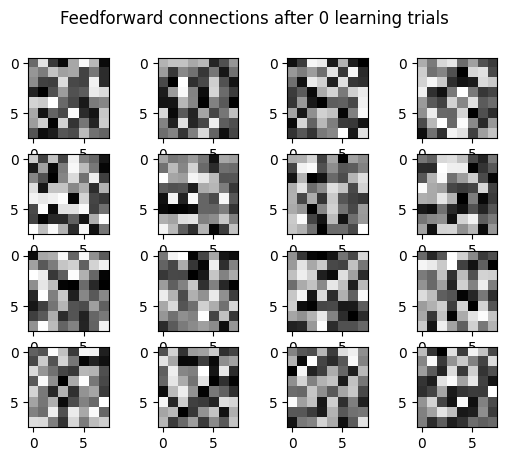

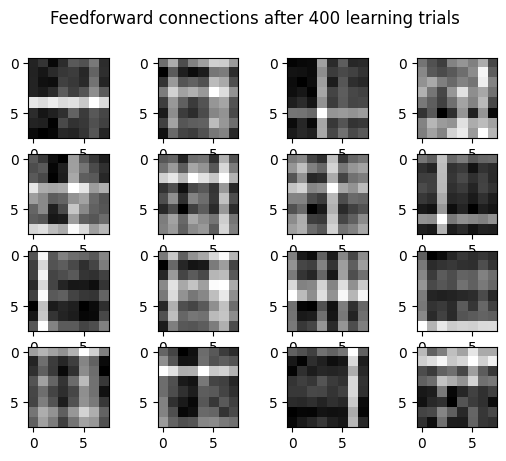

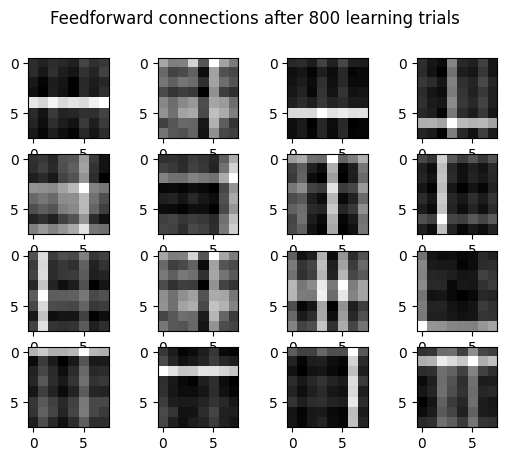

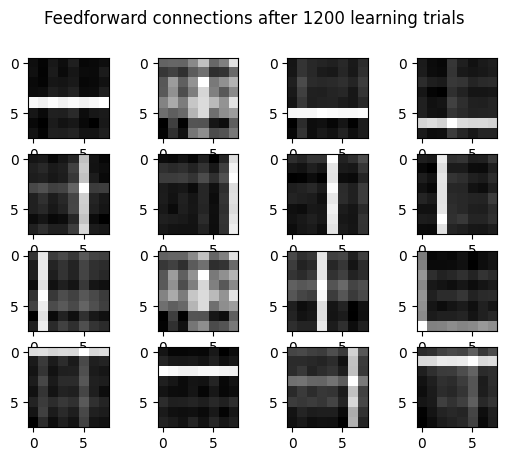

In [5]:
np.random.seed(0)

#pretraining
num_pretrials = 100

for trial in range(num_pretrials):
    data = np.zeros((size,size))
    
    for i in range(size):
        
        if(np.random.binomial(1,p) == 1):
            found = True
            
            for j in range(size):
                data[j,i] = 1  
                
    for i in range(size):
        
        if( np.random.binomial(1,p) == 1):
            
            for j in range(size):
                data[i,j] = 1 
                
    X = np.reshape(data,(m,1))
    dW, dQ, dT = get_weight_updates(X,Q,W,T,100,0.01,alpha_0,beta_0,gamma_0)
    W = W+dW
    Q = Q+dQ
    T = T+dT

fig, ax = plt.subplots(nrows=4, ncols=4)
fig.suptitle(f"Feedforward connections after 0 learning trials")
r = 0
for row in ax:
    c = 0
    for col in row:
        col.imshow(np.reshape(Q[(r * 4) + c, :], (size, size)), cmap="gray")
        c += 1
    r += 1
plt.show() 
    
# training
num_trials = 1200

for trial in range(1,num_trials+1):
    data = np.zeros((size,size))
    
    for i in range(size):
        
        if(np.random.binomial(1,p) == 1):
            found = True
            
            for j in range(size):
                data[j,i] = 1  
                
    for i in range(size):
        
        if(np.random.binomial(1,p) == 1):
            
            for j in range(size):
                data[i,j] = 1 
                
    X = np.reshape(data,(m,1))   
    dW, dQ, dT = get_weight_updates(X,Q,W,T,100,0.01,alpha,beta,gamma)
    W = W+dW
    Q = Q+dQ
    T = T+dT
    
    if (trial % 400 == 0):
        fig, ax = plt.subplots(nrows=4, ncols=4)
        fig.suptitle(f"Feedforward connections after "+str(trial)+" learning trials")
        r = 0
        for row in ax:
            c = 0
            for col in row:
                col.imshow(np.reshape(Q[(r * 4) + c, :], (size, size)), cmap="gray")
                c += 1
            r += 1
        plt.show()
        
        